<a href="https://colab.research.google.com/github/Bestakdv/vhs-intro-ai/blob/main/mnist_digit_recognition_cnn_Yefimenko.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

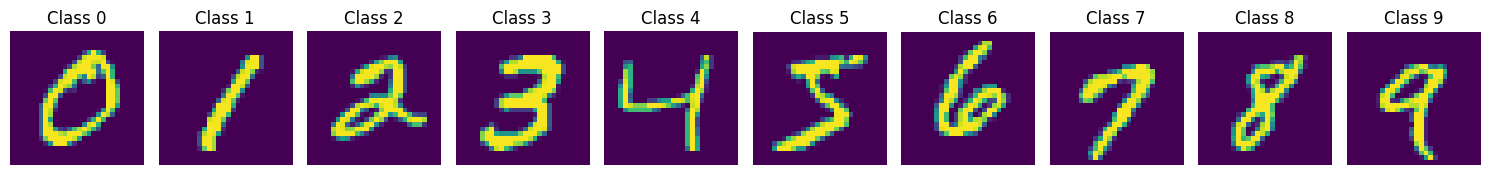

In [5]:
import keras
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.datasets import mnist
from keras.models import Sequential
from keras import layers
from keras.layers import Dense, Dropout, Flatten

#Loads the data
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

#Plots the data
fig, axes = plt.subplots(1, 10, figsize=(15, 4))
for i in range(10):
    axes[i].imshow(X_train[y_train == i][0])
    #Gets rid of the axis
    axes[i].axis('off')
    axes[i].set_title(f"Class {i}")
plt.tight_layout()
plt.show()

In [6]:
from sklearn.model_selection import train_test_split

#Dividing by 255 to make it between [0,1] for white and black pixels
X_train = X_train / 255.0
X_test = X_test / 255.0

#Reshaping
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

Epoch 1/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 33s 17ms/step - accuracy: 0.8602 - loss: 0.4434 - val_accuracy: 0.9781 - val_loss: 0.0659
Epoch 2/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 16ms/step - accuracy: 0.9729 - loss: 0.0871 - val_accuracy: 0.9859 - val_loss: 0.0407
Epoch 3/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 16ms/step - accuracy: 0.9801 - loss: 0.0631 - val_accuracy: 0.9877 - val_loss: 0.0368
Epoch 4/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 16ms/step - accuracy: 0.9817 - loss: 0.0574 - val_accuracy: 0.9893 - val_loss: 0.0304
Epoch 5/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 16ms/step - accuracy: 0.9860 - loss: 0.0460 - val_accuracy: 0.9909 - val_loss: 0.0271
Epoch 6/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 17ms/step - accuracy: 0.9859 - loss: 0.0442 - val_accuracy: 0.9895 - val_loss: 0.0328
Epoch 7/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 17ms/step - accuracy: 0.9884 - loss: 0.0385 - val_accuracy: 0.9919 - val_loss: 0.0270
Epoch 8/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 17ms/step - accuracy: 0.9889 -

<Axes: title={'center': 'Accuracy'}>

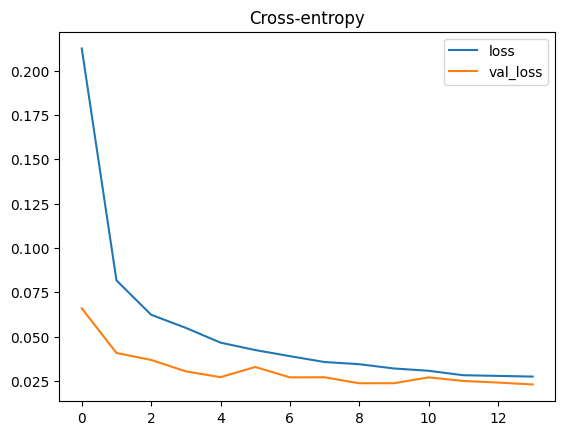

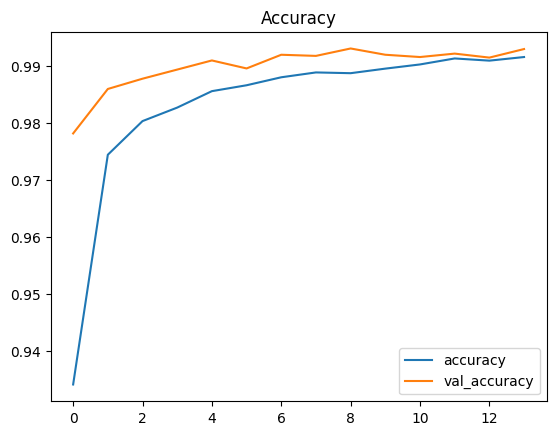

In [7]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam

#One hot encode to get categorical_crossentropy to work
y_train_one_hot = to_categorical(y_train, num_classes=10)
y_val_one_hot = to_categorical(y_test, num_classes=10)

#Best model(results are at the very bottom of every trial)
model = Sequential([
    Flatten(input_shape=(28, 28, 1)),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

mnist_cnn = keras.Sequential([
    keras.Input(shape=(28, 28, 1)),
    layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(10, activation="softmax"),
])

"""
model = Sequential([
    Flatten(input_shape=(28, 28, 1)),
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

model = Sequential([
    Flatten(input_shape=(28, 28, 1)),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])
"""

#Defining optimizer
optimizer = Adam(learning_rate=0.001)

# Compile the model with the Adam optimizer
model.compile(
    optimizer=optimizer,
    loss="categorical_crossentropy",
    metrics=['accuracy']
)

mnist_cnn.compile(
    optimizer=optimizer,
    loss="categorical_crossentropy",
    metrics=['accuracy']
)

# Best based on results
early_stopping = keras.callbacks.EarlyStopping(
    patience=5,
    min_delta=0.001,
    restore_best_weights=True,
)

# Train the model
history = mnist_cnn.fit(
    X_train, y_train_one_hot,
    validation_data=(X_test, y_val_one_hot),
    batch_size=32,
    epochs=30,
    callbacks=[early_stopping],
)

# Plot the results
import pandas as pd
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot(title="Cross-entropy")
history_df.loc[:, ['accuracy', 'val_accuracy']].plot(title="Accuracy")

In [10]:
mnist_cnn.summary()
print(model.summary())

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 10)                  │          16,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 104,480 (408.13 KB)

 Trainable params: 34,826 (136.04 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 69,654 (272.09 KB)

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 256)                 │         200,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 312,416 (1.19 MB)

 Trainable params: 242,762 (948.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 69,654 (272.09 KB)

None


1. Data Handling:
2. Parameter Sharing:
3. Training time for CNN is much longer because of.....
4. Total number of params is: 104,480 for CNN and 312,416 for other model